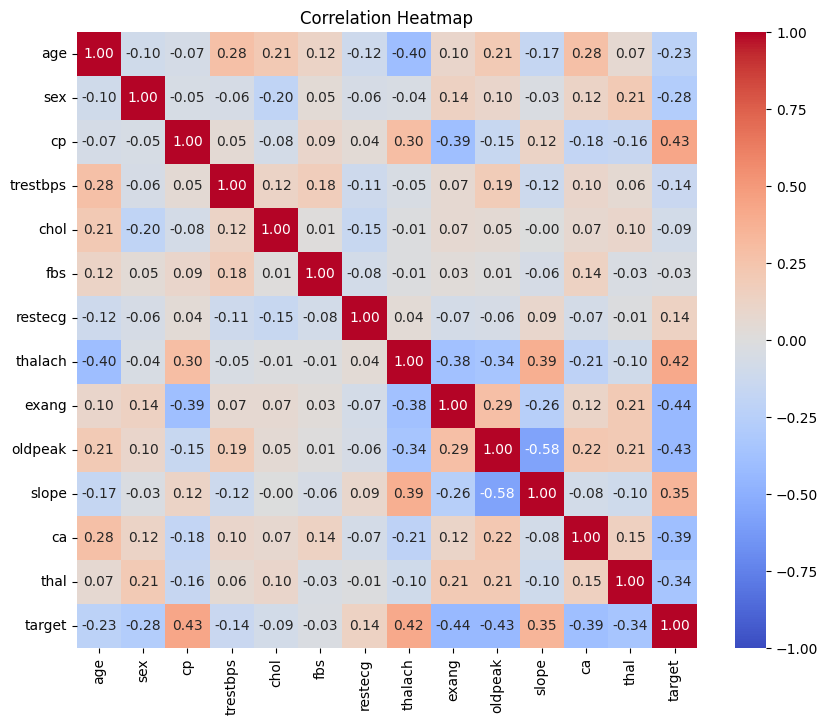

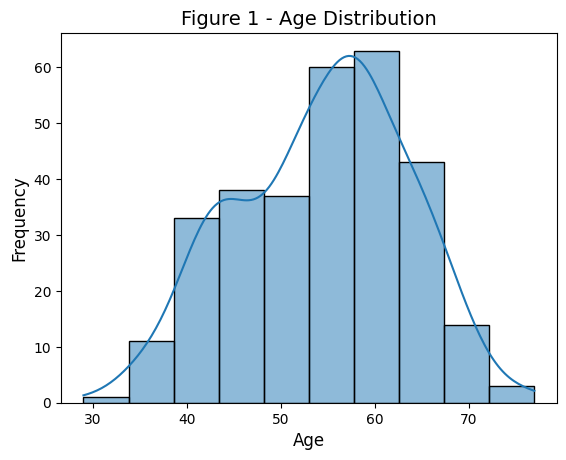

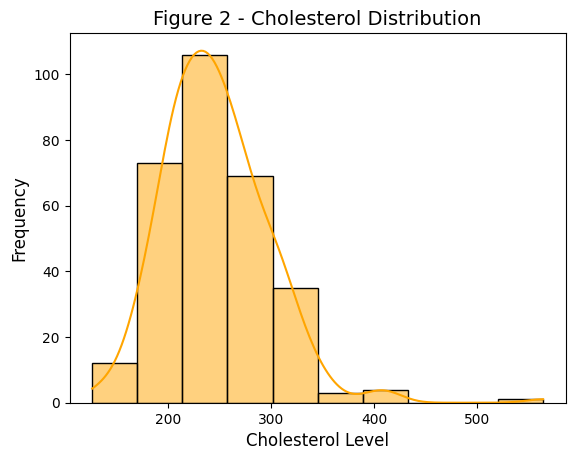

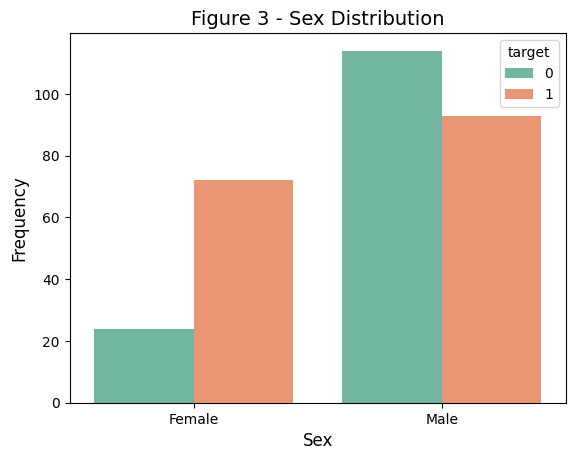

Total number of individuals by gender:

sex
1    207
0     96
Name: count, dtype: int64

Proportion of individuals with heart disease by gender:

sex
0    0.750000
1    0.449275
Name: target, dtype: float64


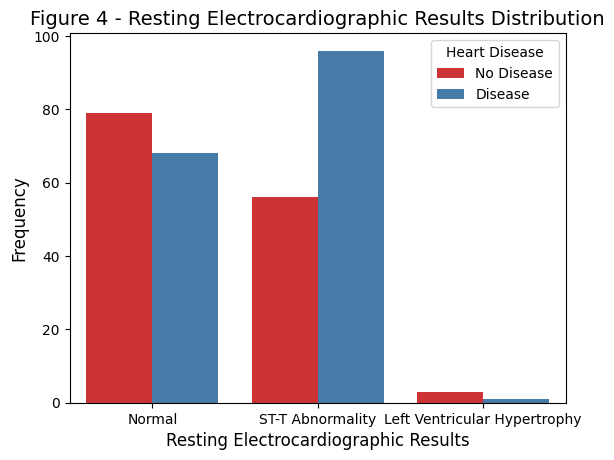

Accuracy Score:

0.8032786885245902
Confusion Matrix:

[[19  9]
 [ 3 30]]
Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



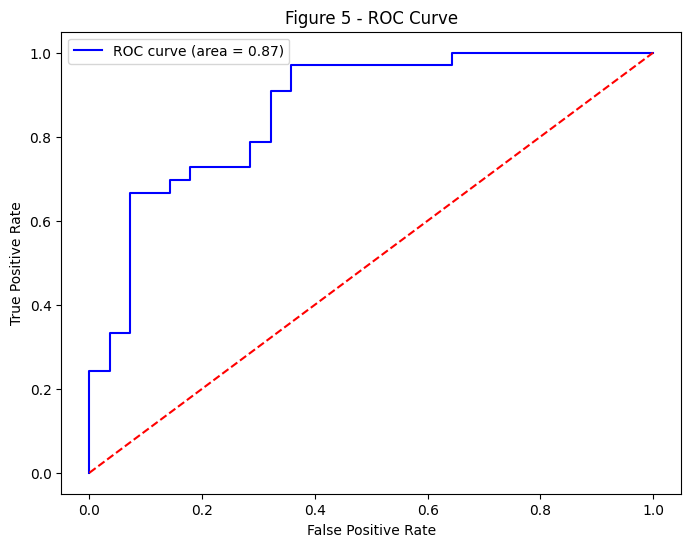

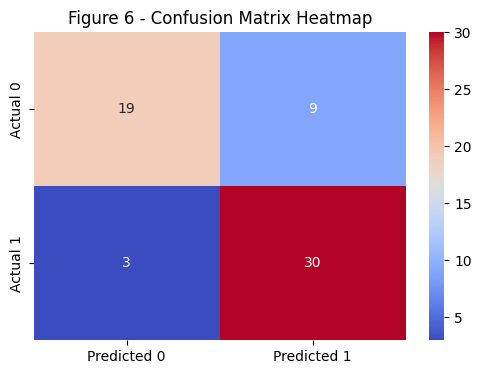

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

#Load Dataset
df = pd.read_excel('Heart Attack Data Set spreadsheet.xlsx', header=0)
df = df.iloc[:,0].str.split(',', expand=True) # Exclude the first column
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
df = df.apply(pd.to_numeric, errors='coerce')

#Create Correlation Heatmap
plt.figure(figsize=(10, 8))
heat_map = sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Visualize Age Distribution
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Figure 1 - Age Distribution' , fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

#Visualize Cholesterol Distribution
sns.histplot(df['chol'], bins=10, kde=True, color='orange', edgecolor='black')
plt.title('Figure 2 - Cholesterol Distribution', fontsize=14)
plt.xlabel('Cholesterol Level', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Visualize Gender Distribution
sns.countplot(data=df, x='sex', hue='target', palette='Set2')
plt.title('Figure 3 - Sex Distribution', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks([0,1], ['Female', 'Male'])
plt.show()

# Table of individuals
print('Total number of individuals by gender:\n')
print(df['sex'].value_counts())
print('\nProportion of individuals with heart disease by gender:\n')
print(df.groupby('sex')['target'].mean())

# Visualize Resting Electrocardiographic Results Distribution
sns.countplot(x='restecg', data=df, hue='target', palette='Set1')
plt.title('Figure 4 - Resting Electrocardiographic Results Distribution', fontsize=14)
plt.xlabel('Resting Electrocardiographic Results', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.xticks([0,1,2], ['Normal', 'ST-T Abnormality', 'Left Ventricular Hypertrophy'])
plt.show()

# Inndependent and Dependent Variables
X = df.drop('target', axis=1)
y = df['target']

#Split Data, Train Model, Make Predictions, Evaluate Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy Score:\n')
print(accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:\n')
print(classification_report(y_test, y_pred))

# Confusion Matrix Heatmap and ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)    
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Figure 5 - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

conf_matr = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
heat_map = sns.heatmap(conf_matr, annot=True, fmt="d", cmap='coolwarm', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Figure 6 - Confusion Matrix Heatmap')
plt.show()

